# 06_associations_gtdbtk

This document explores the phylogenetic make-up of identified MAGs with associated viruses. The data loaded is all_associations_gtdb.csv (created with 05 assoc_gtdb_merge_script.py)

## Load packages and data

In [7]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/all_associations_gtdb.csv')
df = df.fillna("NA")

## How many associations were classified in total?

In [2]:
tot = len(df['domain'])
tot

336

## How many MAGs were classified to at least that classification level?

In [9]:
d_assoc = len(df[df['domain']!= "NA"])
p_assoc = len(df[df['phyla']!="NA"])
c_assoc =len(df[df['class']!="NA"])
o_assoc=len(df[df['order']!="NA"])
f_assoc=len(df[df['family']!="NA"])
g_assoc=len(df[df['genus']!="NA"]) 
s_assoc=len(df[df['species']!="NA"])

# create a data frame of the number of MAGs associated with each level
dict_assoc = {'tax_level': ['total', 'domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'num_associations_classified':
   [tot, d_assoc, p_assoc, c_assoc, o_assoc, f_assoc, g_assoc, s_assoc]}
GTDB_assoc = pd.DataFrame(data = dict_assoc)

# add a column to the dataframe that is the percent of MAGs
GTDB_assoc['percent_classified']=GTDB_assoc['num_associations_classified']/tot*100

GTDB_assoc

,tax_level,num_associations_classified,percent_classified
0,total,336,100.000000
1,domain,336,100.000000
2,phyla,196,58.333333
3,class,196,58.333333
4,order,196,58.333333
5,family,196,58.333333
6,genus,166,49.404762
7,species,129,38.392857


Text(0.5, 1.0, 'Percent of MAGs Classified with GTDB')

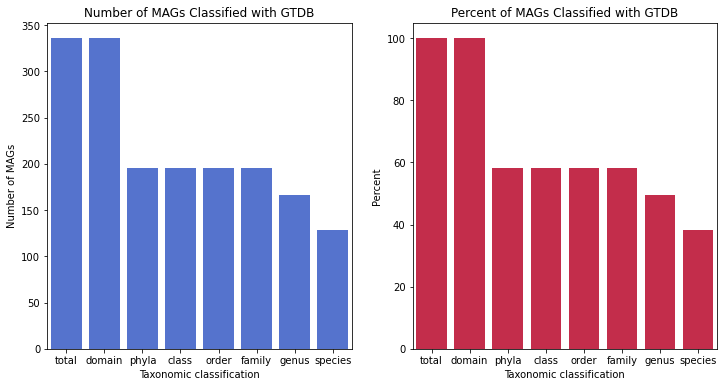

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

sns.barplot(x = 'tax_level', y= 'num_associations_classified', data = GTDB_assoc, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of MAGs')
axes[0].set_title('Number of MAGs Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = GTDB_assoc, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of MAGs Classified with GTDB')

## What are the most common classifications?

In [13]:
phyla_assoc = df.groupby('phyla', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_phyla_assoc = phyla_assoc [2:11] # 1 is NA

class_assoc = df.groupby('class', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_class_assoc = class_assoc [2:11] # 1 is NA

order_assoc = df.groupby('order', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_order_assoc = order_assoc [2:11] # 1 is NA

Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

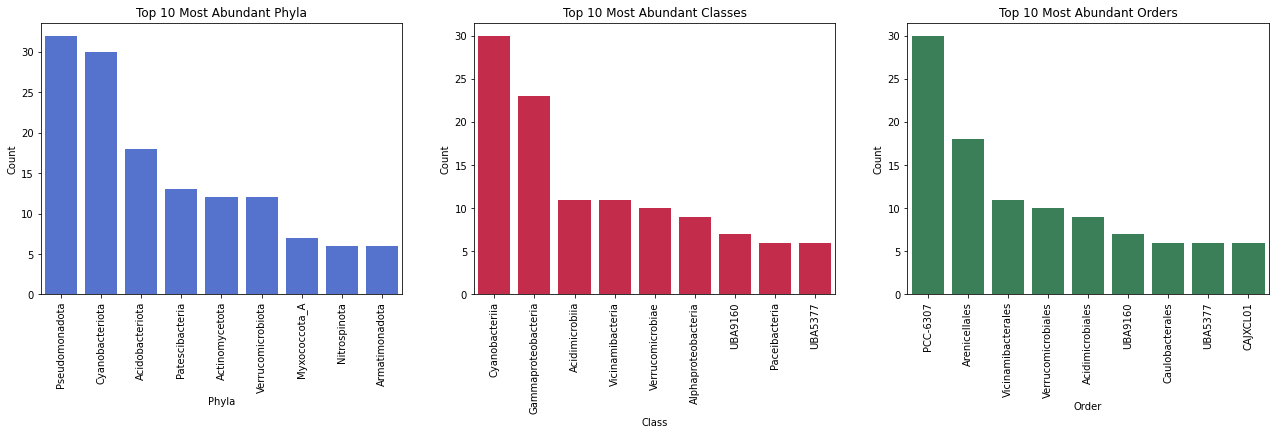

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'host_name', data = top_phyla_assoc, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'host_name', data = top_class_assoc, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'host_name', data = top_order_assoc, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')


## Plot tax level

In [18]:
top_10_class = list(df.groupby('class', as_index = False)['host_name'].count().sort_values(by = 'host_name', ascending = False)[:10]['class'])

plot_class = []

for item in df['class']:
    if item in top_10_class:
        plot_class.append(item)
    else:
        plot_class.append('Other')

df['plot_class'] = plot_class

Text(0.5, 1.0, 'Count')

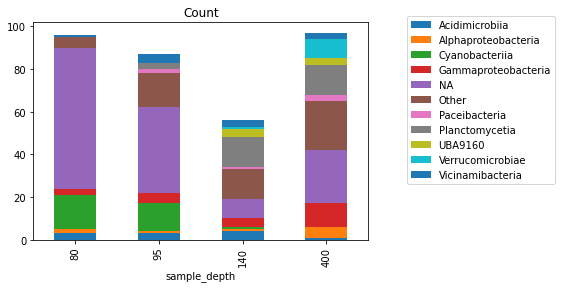

In [22]:
class_counts_assoc = df.groupby(['sample_depth', 'plot_class'], as_index = False)['host_name'].count().pivot(columns = 'plot_class', index = 'sample_depth', values = 'host_name')

class_counts_assoc.plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Count')

Text(0.5, 1.0, 'Percent')

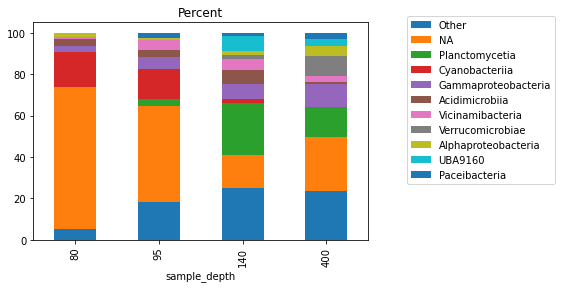

In [25]:
column_order = ['Other'] + top_10_class

class_pcts = class_counts_assoc.div(class_counts_assoc.sum(axis=1), axis=0)
class_pcts = round(class_pcts * 100, 1)



class_pcts[column_order].plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Percent')